**20250723 Economics Analysis - Import Price Index**

The current administration has made a number of tariffs based policies since President Trump has started his second term in the White House.  This exercise attempts to utilizes Import Price Index data to examine some of the effects of tariffs and escalated trade tensions.

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
from pandas_datareader import data as pdr

In [2]:
# Input FRED API key here
# fred_key ="Your FRED API Key here"
#fred_key =""
fred = Fred(fred_key)

**How are import price changes related to US domestic consumer price index?  Are import price from different regions strongly correlated with domestic inflation?**

1) US Consumer Price Index indicator

    Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

3) Import Price Index by Origins

    Import Price Index by Origin (NAICS): All Industries for China (CHNTOT)

    Import Price Index by Origin (NAICS): All Industries for Japan (JPNTOT)

    Import Price Index by Origin (NAICS): All Industries for United Kingdom (UKTOT)

    Import Price Index by Origin (NAICS): All Industries for Mexico (MEXTOT)

    Import Price Index by Origin (NAICS): All Industries for Germany (GERTOT)

    Import Price Index by Origin (NAICS): All Industries for Canada (CANTOT)

    Import Price Index by Origin (NAICS): All Industries for France (FRNTOT)

    Import Price Index by Origin (NAICS): All Industries for Industrialized Countries (INDUSTOT)

    Import Price Index by Origin (NAICS): All Industries for European Union (EECTOT)

    Import Price Index by Origin (NAICS): All Industries for Asian Newly Industrialized Countries (OASTOT)

In [3]:
#President Trump first term started on Jan 20, 2017.  
#To show the change in the indices during his first term, COVID and second term so far
#Let's start from beginning of 2017
start_date = "2017-01-01"
#end_date = '2023-12-31'

In [4]:
price_index_id = ["CPIAUCSL",
                 'CHNTOT', 'JPNTOT', 'UKTOT', 'MEXTOT', 'GERTOT',
                 'CANTOT', 'FRNTOT', 'INDUSTOT', 'EECTOT', 'OASTOT'
                 ]
df_import_price_index = pdr.DataReader(price_index_id, 'fred', start=start_date) #end=end_date)
df_import_price_index.dropna()

,CPIAUCSL,CHNTOT,JPNTOT,UKTOT,MEXTOT,GERTOT,CANTOT,FRNTOT,INDUSTOT,EECTOT,OASTOT
DATE,,,,,,,,,,,
2017-01-01,243.618,99.9,96.2,117.5,123.0,113.1,124.4,121.3,118.7,132.2,84.4
2017-02-01,244.006,100.0,96.3,117.7,123.5,113.3,125.8,121.0,119.3,132.1,84.9
2017-03-01,243.892,100.2,96.5,117.7,124.0,113.3,124.4,121.4,119.0,132.3,85.2
2017-04-01,244.193,100.1,96.4,117.1,126.4,113.9,124.4,120.9,119.2,132.3,85.7
2017-05-01,244.004,100.1,96.4,117.2,126.9,113.7,125.2,120.8,119.4,132.3,85.8
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,319.775,99.8,102.3,140.0,150.7,126.3,174.8,157.7,147.9,157.6,96.4
2025-03-01,319.615,99.3,102.2,140.1,150.1,126.3,171.6,160.9,147.4,157.1,95.9
2025-04-01,320.321,98.5,102.1,140.5,149.6,126.5,171.6,159.9,147.8,157.7,96.0


In [5]:
price_index_base_2017 = df_import_price_index.iloc[0]
df_import_price_index = df_import_price_index.div(price_index_base_2017)
df_import_price_index

,CPIAUCSL,CHNTOT,JPNTOT,UKTOT,MEXTOT,GERTOT,CANTOT,FRNTOT,INDUSTOT,EECTOT,OASTOT
DATE,,,,,,,,,,,
2017-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-02-01,1.001593,1.001001,1.001040,1.001702,1.004065,1.001768,1.011254,0.997527,1.005055,0.999244,1.005924
2017-03-01,1.001125,1.003003,1.003119,1.001702,1.008130,1.001768,1.000000,1.000824,1.002527,1.000756,1.009479
2017-04-01,1.002360,1.002002,1.002079,0.996596,1.027642,1.007073,1.000000,0.996702,1.004212,1.000756,1.015403
2017-05-01,1.001584,1.002002,1.002079,0.997447,1.031707,1.005305,1.006431,0.995878,1.005897,1.000756,1.016588
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,1.312608,0.998999,1.063410,1.191489,1.225203,1.116711,1.405145,1.300082,1.245998,1.192133,1.142180
2025-03-01,1.311951,0.993994,1.062370,1.192340,1.220325,1.116711,1.379421,1.326463,1.241786,1.188351,1.136256
2025-04-01,1.314849,0.985986,1.061331,1.195745,1.216260,1.118479,1.379421,1.318219,1.245156,1.192890,1.137441


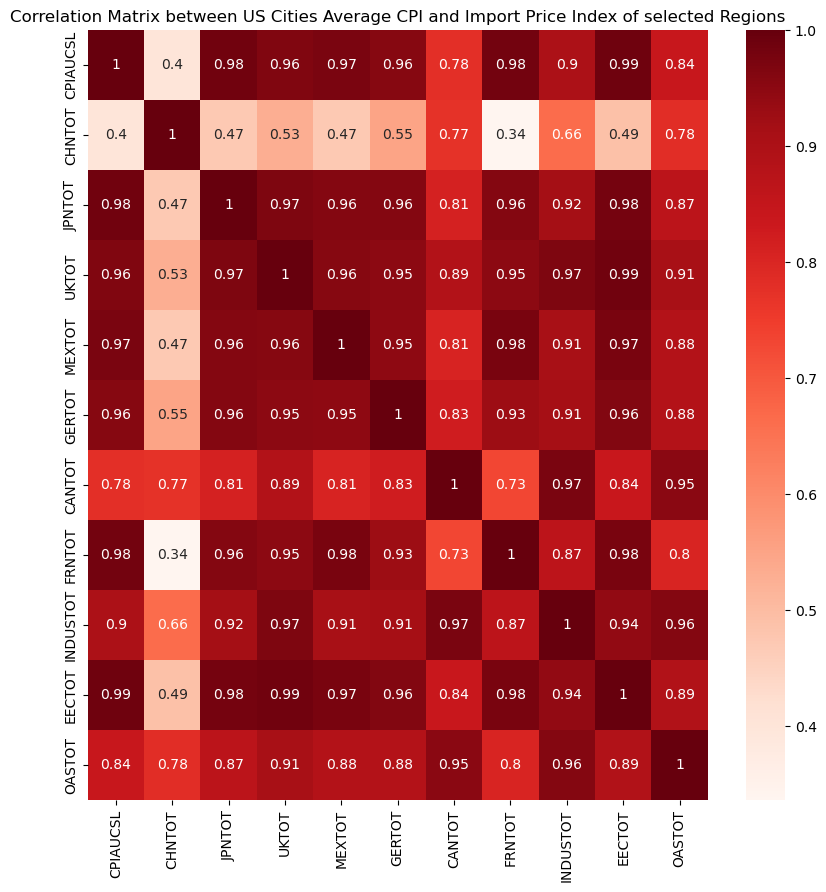

In [6]:
plt.figure(figsize = (10,10))
ax = plt.axes()
sns.heatmap(df_import_price_index.corr(), cmap="Reds", annot=True, ax = ax)
ax.set_title('Correlation Matrix between US Cities Average CPI and Import Price Index of selected Regions')
plt.show()

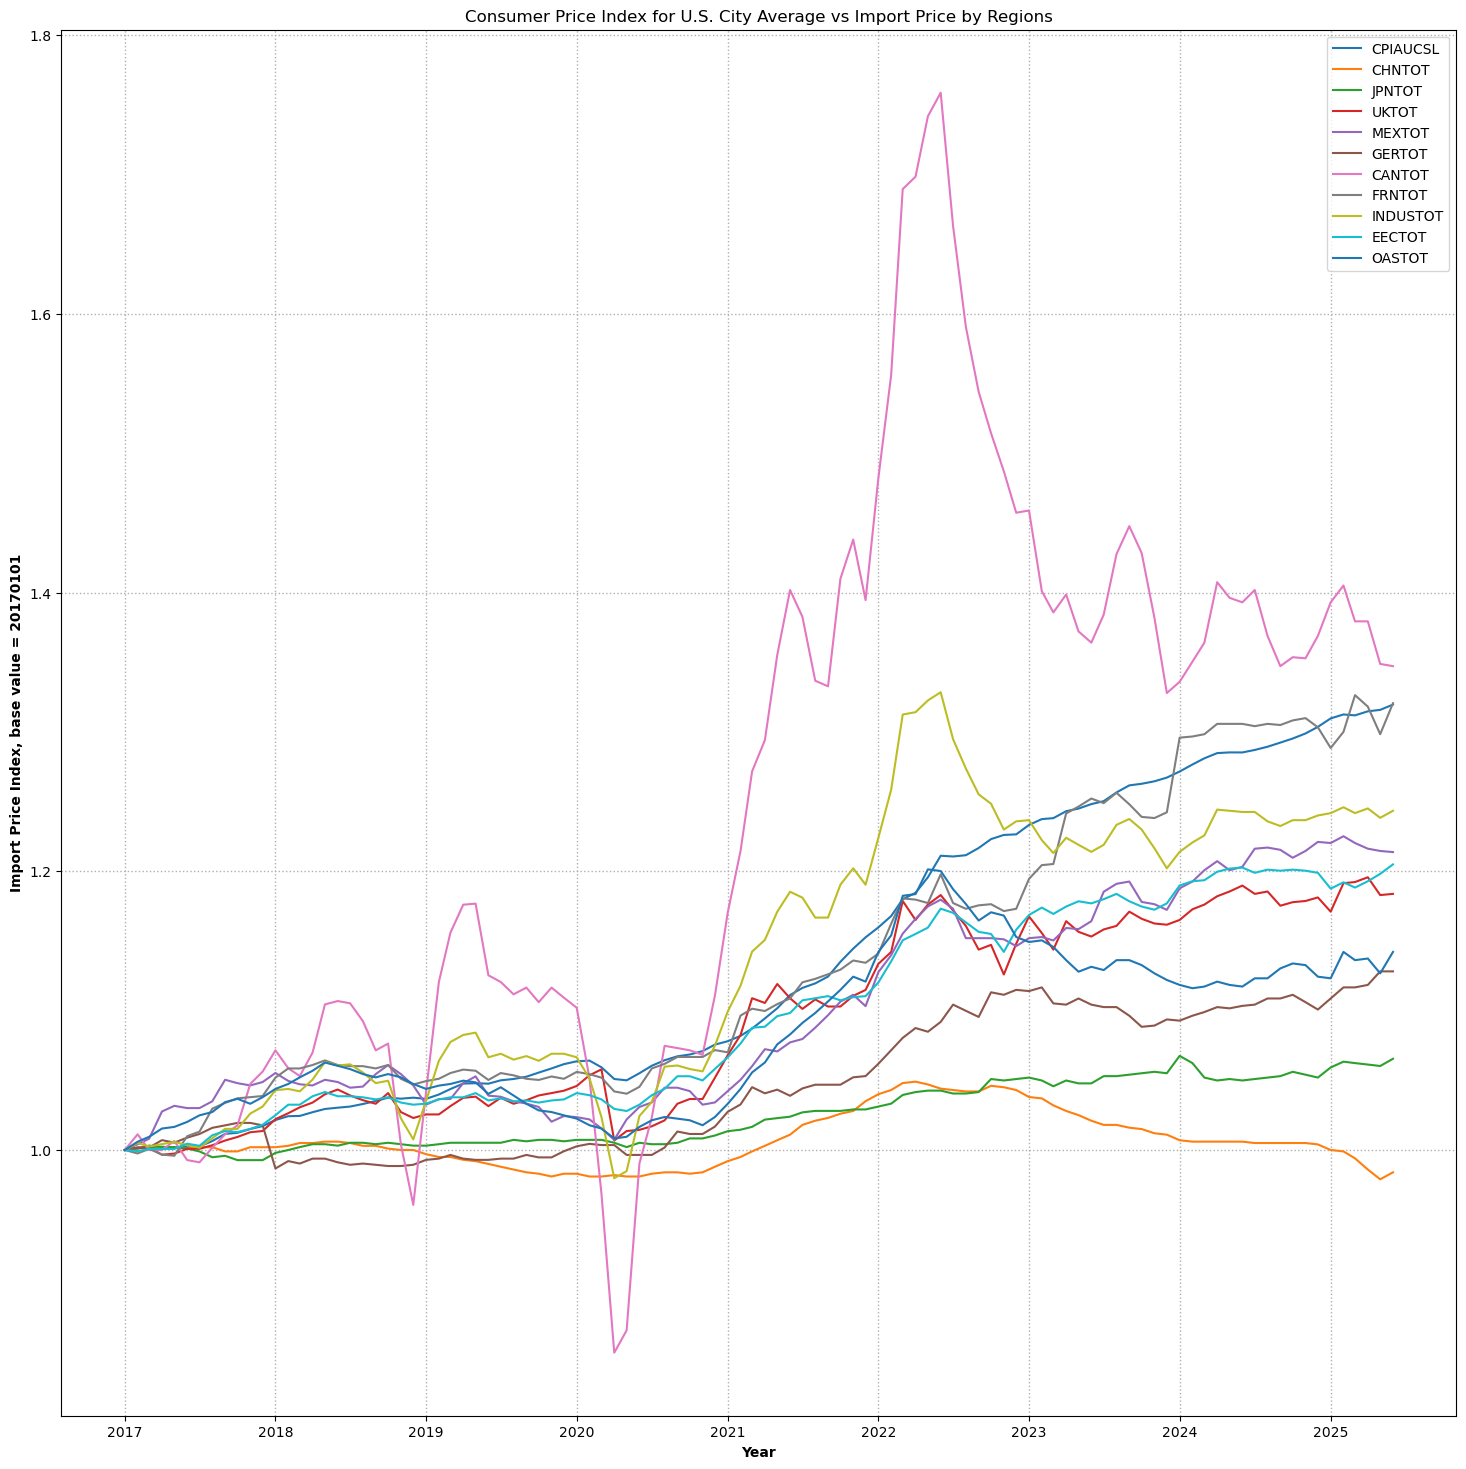

In [7]:
plt.figure(figsize = (18,18))
for i in range(len(df_import_price_index.columns)):
    plt.plot(df_import_price_index.index, df_import_price_index.iloc[:,i].values, 
             label=df_import_price_index.iloc[:,i].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Import Price Index, base value = 20170101", fontweight = 'bold')
plt.title("Consumer Price Index for U.S. City Average vs Import Price by Regions")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


The correlation table suggests that US consumer price index has high correlations with the imports to the US from its trade parnters, such as Japan, UK, Mexico, Germany and France (>0.9) and is generally highly correlated to imports to US from industralial countries and EU (>0.9).

Imports from Canada to US are somehow less correlated (0.7).  The line chart shows that import price index of Canadaian goods have been far more volatile.  

Despite the on-going geopolitical tensions between China and US, the import price of Chinese goods to US has been relatively stable.  The price index has been decreasing since 2022.

**How have import price for different types of products have changed?  How are they related to US domestic inflation?**

1) US Consumer Price Index indicator

    Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

3) Import Price Index by category:

    Import Price Index (End Use): Foods, Feeds, and Beverages (IR0)

    Import Price Index (End Use): Furniture, Household Goods (IR41000)

    Import Price Index (End Use): Gem Diamonds (IR42100)

    Import Price Index (End Use): Coins, Gems, Jewelry, and Collectibles (IR413)

    Import Price Index (End Use): Consumer Goods, Excluding Automotives (IR4)

    Import Price Index (End Use): Automotive Vehicles, Parts and Engines (IR3)

    Import Price Index (End Use): Semiconductors (IR21320)

    Import Price Index (End Use): Crude Oil (IR10000)

    Import Price Index (End Use): Bauxite and Aluminum (IR14200)

    Import Price Index (End Use): Zinc (IR14260)

    Import Price Index (End Use): Industrial Supplies and Materials (IR1)

    Import Price Index (End Use): Food Oils and Oilseeds (IR00150)

    Import Price Index (End Use): Other Agricultural Foods (IR001)
   
    Import Price Index (End Use): All Imports Excluding Food and Fuels (IREXFDFLS)

    Import Price Index (End Use): All Commodities (IR)
   
    Import Price Index (End Use): All Imports Excluding Petroleum (IREXPET)


In [8]:
price_index_prod_id = ["CPIAUCSL",
                 'IR0', 'IR41000', 'IR42100', 'IR413', 'IR4',
                 'IR3', 'IR21320', 'IR10000', 'IR14200',
                 'IR14260', 'IR1', 'IR00150',
                 'IR001', 'IREXFDFLS', 'IR', 'IREXPET'
                 ]
df_import_price_index_prod = pdr.DataReader(price_index_prod_id, 'fred', start=start_date) #end=end_date)
df_import_price_index_prod.dropna()

,CPIAUCSL,IR0,IR41000,IR42100,IR413,IR4,IR3,IR21320,IR10000,IR14200,IR14260,IR1,IR00150,IR001,IREXFDFLS,IR,IREXPET
DATE,,,,,,,,,,,,,,,,,
2017-01-01,243.618,177.0,128.7,102.9,208.1,106.9,110.1,60.4,194.0,119.2,214.1,168.3,86.7,191.5,98.2,122.3,111.2
2017-02-01,244.006,178.2,128.7,102.9,209.8,107.1,110.1,60.5,198.1,123.5,234.5,169.9,89.1,193.3,98.5,122.7,111.5
2017-03-01,243.892,177.9,128.8,103.8,208.5,106.9,110.1,60.5,191.6,128.3,235.4,169.2,86.0,193.2,98.7,122.5,111.6
2017-04-01,244.193,178.5,128.9,103.8,209.2,107.0,110.6,60.6,190.5,130.0,228.8,169.9,83.9,195.2,98.9,122.8,111.9
2017-05-01,244.004,180.2,128.9,103.8,208.6,106.9,110.6,60.7,191.2,129.3,217.6,169.0,83.9,197.8,98.9,122.7,111.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,319.775,236.1,141.4,100.4,311.8,110.1,121.8,58.4,303.8,227.7,244.3,249.7,120.5,256.1,109.4,142.1,126.2
2025-03-01,319.615,235.8,141.5,100.4,320.3,109.6,121.7,58.4,296.4,230.6,240.9,246.6,116.6,253.7,109.3,141.6,126.0
2025-04-01,320.321,235.5,141.8,100.4,328.7,109.9,122.0,62.2,290.2,224.4,230.7,244.9,116.8,253.1,109.8,141.8,126.4


In [9]:
price_index_prod_base_2017 = df_import_price_index_prod.iloc[0]
df_import_price_index_prod = df_import_price_index_prod.div(price_index_prod_base_2017)
df_import_price_index_prod

,CPIAUCSL,IR0,IR41000,IR42100,IR413,IR4,IR3,IR21320,IR10000,IR14200,IR14260,IR1,IR00150,IR001,IREXFDFLS,IR,IREXPET
DATE,,,,,,,,,,,,,,,,,
2017-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-02-01,1.001593,1.006780,1.000000,1.000000,1.008169,1.001871,1.000000,1.001656,1.021134,1.036074,1.095283,1.009507,1.027682,1.009399,1.003055,1.003271,1.002698
2017-03-01,1.001125,1.005085,1.000777,1.008746,1.001922,1.000000,1.000000,1.001656,0.987629,1.076342,1.099486,1.005348,0.991926,1.008877,1.005092,1.001635,1.003597
2017-04-01,1.002360,1.008475,1.001554,1.008746,1.005286,1.000935,1.004541,1.003311,0.981959,1.090604,1.068660,1.009507,0.967705,1.019321,1.007128,1.004088,1.006295
2017-05-01,1.001584,1.018079,1.001554,1.008746,1.002403,1.000000,1.004541,1.004967,0.985567,1.084732,1.016348,1.004159,0.967705,1.032898,1.007128,1.003271,1.006295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,1.312608,1.333898,1.098679,0.975705,1.498318,1.029935,1.106267,0.966887,1.565979,1.910235,1.141056,1.483660,1.389850,1.337337,1.114053,1.161897,1.134892
2025-03-01,1.311951,1.332203,1.099456,0.975705,1.539164,1.025257,1.105359,0.966887,1.527835,1.934564,1.125175,1.465241,1.344867,1.324804,1.113035,1.157809,1.133094
2025-04-01,1.314849,1.330508,1.101787,0.975705,1.579529,1.028064,1.108084,1.029801,1.495876,1.882550,1.077534,1.455140,1.347174,1.321671,1.118126,1.159444,1.136691


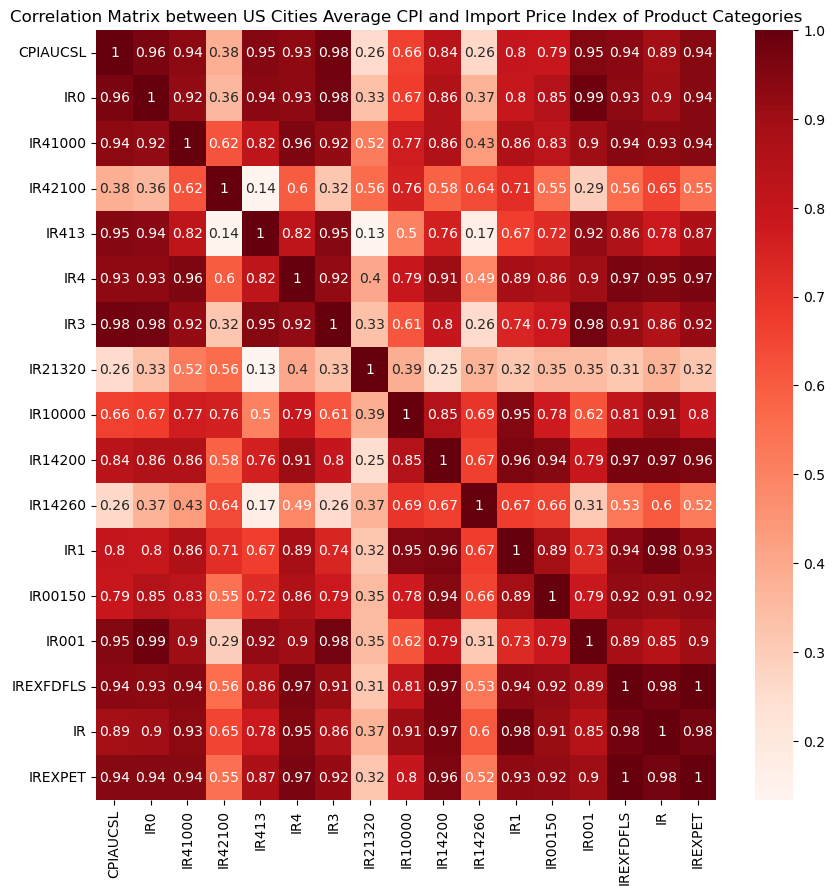

In [10]:
plt.figure(figsize = (10,10))
ax = plt.axes()
sns.heatmap(df_import_price_index_prod.corr(), cmap="Reds", annot=True, ax = ax)
ax.set_title('Correlation Matrix between US Cities Average CPI and Import Price Index of Product Categories')
plt.show()

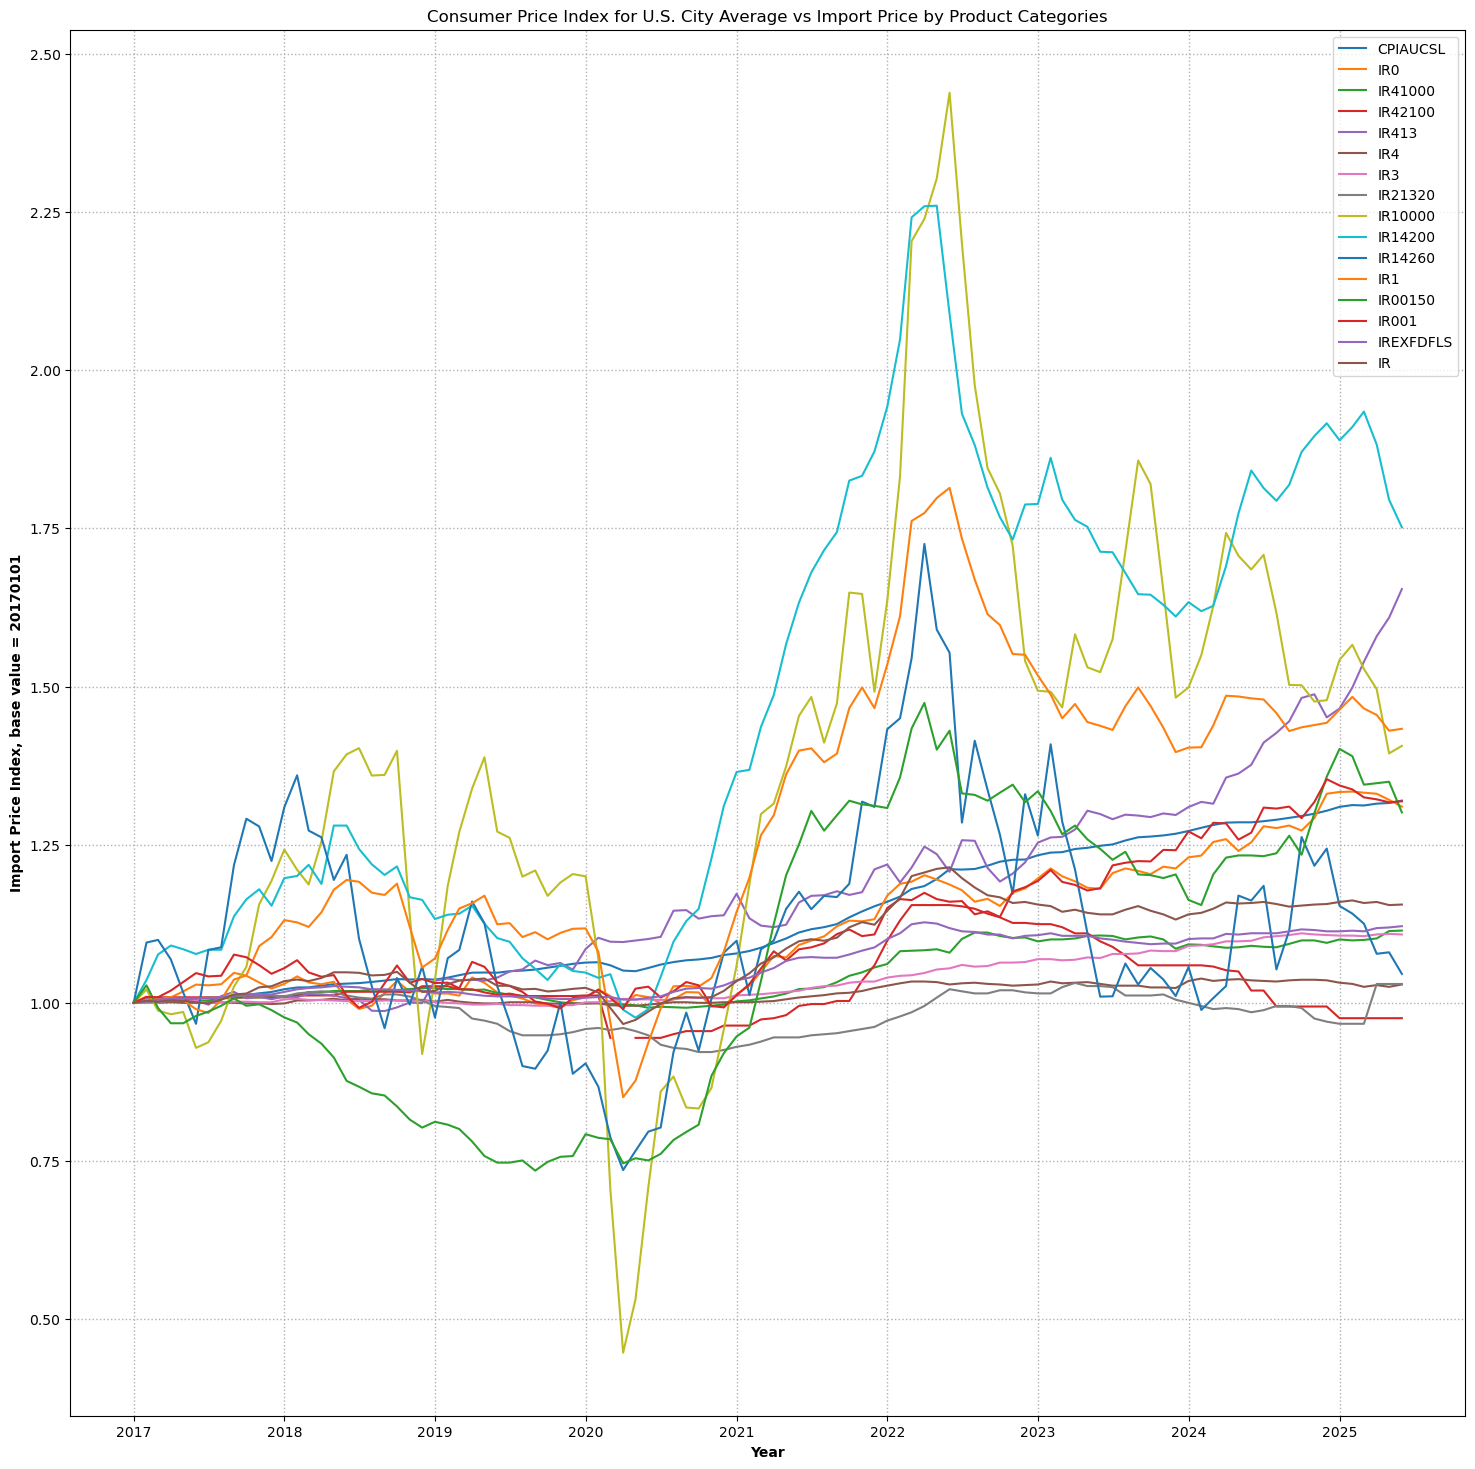

In [11]:
plt.figure(figsize = (18,18))
for i in range(len(df_import_price_index_prod.columns)-1):
    plt.plot(df_import_price_index_prod.index, df_import_price_index_prod.iloc[:,i].values, 
             label=df_import_price_index_prod.iloc[:,i].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Import Price Index, base value = 20170101", fontweight = 'bold')
plt.title("Consumer Price Index for U.S. City Average vs Import Price by Product Categories")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


One interesting observation is that Semiconductors (IR21320) has low correlations with US domestic CPI as well as other products' import price indices in the given time interval (2017 to 2025).  During the COVID pandemic, since the global supply chain was under extreme stresses, the shortage of semiconductor has become a major concern by business leaders and policy makers.   The St. Louis Fred Research has also published an article related to this topic back in 2022.  https://www.stlouisfed.org/on-the-economy/2022/may/did-computer-chip-shortage-affect-inflation


It is within expectation that Gem Diamonds (IR42100) generally has low correlations with US average CPI and the other types of imported goods (generally below 0.5).  It has a moderate positive correlation with Furniture, Household Goods (IR41000).  Given that furniture is not a daily necessity for a consumer, this seems reasonable.

While Zinc is used in manufacturing for multiple processes such as corrosion protection, ally production, chemical production, battery production and rubber production.  Its import price index is not strongly correlated to other products as well as the US CPI.


In general, these categories are highly correlated US Cities Average CPI (>0.9): Foods, Feeds, and Beverages (IR0), Furniture, Household Goods (IR41000), Coins, Gems, Jewelry, and Collectibles (IR413), Consumer Goods, Excluding Automotives (IR4) ,Automotive Vehicles, Parts and Engines (IR3).

Semiconductors (IR21320) does not seem to be a significant contributor to inflation.

Crude Oil (IR10000) is positively correlated at 0.6.  

Inputs to manufacturing have more positively correlated - Bauxite and Aluminum (IR14200): 0.84, Industrial Supplies and Materials (IR1): 0.8, Food Oils and Oilseeds (IR00150): 0.79, Other Agricultural Foods (IR001).


While Crude Oil and Semiconductors are strategically important, it seems that the US domestic economy has been more sensitive to 1) imported inputs of production 2) imported consumer goods. 

Increase importing from trade partners whose costs are highly correlated with domestic costs may not be immediately able to manage domestic price level right away.  While Crude Oil and Semiconductor productions have had a lot of media attention, especially in the recent years, the import price levels of production inputs may play larger roles in the US CPI.